## Initialize a few things

In [46]:
import emcee
import corner
import speclite as speclite; from speclite import filters
from tqdm import tqdm
from matplotlib import cm
from matplotlib.artist import Artist
from chromatic import *
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from PyAstronomy import pyasl
from specutils.spectra import Spectrum1D, SpectralRegion
from specutils.fitting import fit_generic_continuum

In [47]:
transmission_data = np.loadtxt('../data/transmission_comp.txt')
mol_wave = transmission_data[:,0] * u.nm
mol_data = transmission_data[:,1]

plt.rc("mathtext", fontset="stix")
plt.rcParams['lines.linewidth']   = 1
plt.rcParams['axes.linewidth']    = 2
plt.rcParams['xtick.major.width'] =2
plt.rcParams['ytick.major.width'] =2
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['axes.labelweight']='semibold'
plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['font.weight'] = 'semibold'
plt.rcParams['axes.titleweight']='semibold'
plt.rcParams['axes.titlesize']=9

In [48]:
NRES_Spectra = {
    
    "F21" : {
        
        "53" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "54" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "55" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "56" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "57" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "58" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "59" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "60" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "61" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "62" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "63" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "64" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "65" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "66" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "67" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "68" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "69" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "70" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "71" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "72" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "73" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "74" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "75" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "76" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "77" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "78" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "79" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "80" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "81" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "82" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "83" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        }   
    },
    
    "S22" : {
        "53" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "54" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "55" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "56" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "57" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "58" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "59" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "60" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "61" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "62" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "63" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "64" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "65" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "66" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "67" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "68" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "69" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "70" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "71" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "72" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "73" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "74" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "75" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "76" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "77" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "78" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "79" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "80" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "81" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "82" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "83" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        }   
    }
}

In [49]:
bandpass=np.linspace(3800.,10000.,400)*u.angstrom

sdss_responses = speclite.filters.load_filters('sdss2010-*')
response_g = sdss_responses[1].interpolator(bandpass)
response_r = sdss_responses[2].interpolator(bandpass)
response_i = sdss_responses[3].interpolator(bandpass)

## Spectrum normalization functions

In [50]:
def normalize_nres(data_flux,wavelength=None,**kwargs):
    
    flux = data_flux * u.erg
    
    _m = flux/np.nanmedian(flux)
    spectrum = Spectrum1D(flux=_m, spectral_axis=wavelength)
    with warnings.catch_warnings():  # Ignore warnings
        warnings.simplefilter('ignore')
        g1_fit = fit_generic_continuum(spectrum)
        continuum_fit = g1_fit(wavelength)
        
    normed_flux = _m/continuum_fit
    
    return normed_flux

In [51]:
def normalized_1T_PHOENIX(Tspec=3650,wavelength=None,**kwargs):
        
    _model = get_phoenix_photons(temperature=float(Tspec),wavelength=wavelength,
                                 logg=4.52, metallicity=0.12)
    
    _m = _model[1]/np.nanmedian(_model[1])
    spectrum = Spectrum1D(flux=_m, spectral_axis=_model[0])
    with warnings.catch_warnings():  # Ignore warnings
        warnings.simplefilter('ignore')
        g1_fit = fit_generic_continuum(spectrum)
        continuum_fit = g1_fit(_model[0])
        
    normed_model = _m/continuum_fit
    
    return normed_model

In [52]:
def normalized_2T_PHOENIX(parameters=[0.3,0.06,3000.,3800.],w1=None,w2=None, **kwargs):
    
    f_spot,df_spot,T_spot,T_amb = parameters
    f_amb = 1.0 - f_spot
    
    S_cool_21 = get_phoenix_photons(temperature=int(parameters[2]),wavelength=w1,
                                    logg=4.52,metallicity=0.12)
    S_mid_21 = get_phoenix_photons(temperature=int(parameters[3]),wavelength=w1,
                                   logg=4.52,metallicity=0.12)
    
    S_cool_22 = get_phoenix_photons(temperature=int(parameters[2]),wavelength=w2,
                                    logg=4.52,metallicity=0.12)
    S_mid_22 = get_phoenix_photons(temperature=int(parameters[3]),wavelength=w2,
                                   logg=4.52,metallicity=0.12)
    
    _m = f_spot*S_cool_21[1] + f_amb*S_mid_21[1]
    normed_spec = _m/np.nanmedian(_m)
    spectrum = Spectrum1D(flux=normed_spec, spectral_axis=S_mid_21[0])
    with warnings.catch_warnings():  # Ignore warnings
        warnings.simplefilter('ignore')
        g1_fit = fit_generic_continuum(spectrum)
        continuum_fit = g1_fit(S_mid_21[0])
    model21 = normed_spec/continuum_fit
    
    _m = f_spot*S_cool_22[1] + f_amb*S_mid_22[1]
    normed_spec = _m/np.nanmedian(_m)
    spectrum = Spectrum1D(flux=normed_spec, spectral_axis=S_mid_22[0])
    with warnings.catch_warnings():  # Ignore warnings
        warnings.simplefilter('ignore')
        g1_fit = fit_generic_continuum(spectrum)
        continuum_fit = g1_fit(S_mid_22[0])
    model22 = normed_spec/continuum_fit
    
    return model21,model22

## Photometric variability model

In [53]:
def photometric_variability_model(parameters=None,plot=False,
                                  samples_exist=False,samples=None,
                                  label=None,title=None,
                                  **kwargs):
    
    f_spot,df_spot,T_spot,T_amb = parameters
    bandpass=np.linspace(3800.,10000.,400)*u.angstrom

    spotflux = get_phoenix_photons(temperature=int(T_spot), wavelength = bandpass,logg=4.52, metallicity=0.12)[1]
    ambflux = get_phoenix_photons(temperature=int(T_amb), wavelength = bandpass,logg=4.52, metallicity=0.12)[1]
    this_model_spectrum = f_spot*spotflux + (1.0-f_spot)*ambflux
                     
    d_lambda = (bandpass[1]-bandpass[0])
    contrast = 1.-(spotflux/ambflux)
    ds_over_s = -df_spot * ( contrast / ( 1.-f_spot * contrast ) )
    semi_amplitude = np.abs(ds_over_s)

    numerator = np.nansum(semi_amplitude*this_model_spectrum*response_g*d_lambda)
    denominator = np.nansum(this_model_spectrum*response_g*d_lambda)
    modelgp = numerator/denominator

    numerator = np.nansum(semi_amplitude*this_model_spectrum*response_r*d_lambda)
    denominator = np.nansum(this_model_spectrum*response_r*d_lambda)
    modelrp = numerator/denominator

    numerator = np.nansum(semi_amplitude*this_model_spectrum*response_i*d_lambda)
    denominator = np.nansum(this_model_spectrum*response_i*d_lambda)
    modelip = numerator/denominator

    if visit == 'F21':
        model = np.array([modelgp,modelrp,modelip])
        model_coords = [4750,6200,7550]
        w_err = [500,400,500]
        phot_data = np.array([0.076,0.071,0.041])
        phot_errs = np.array([0.006,0.006,0.007])*1.25

    if visit == 'S22':
        model = np.array([modelgp,modelrp])
        model_coords = [4750,6200]
        w_err = [500,400]
        phot_data = np.array([0.075,0.075])
        phot_errs = np.array([0.003,0.003])*1.25
        
    if visit == 'jointvisit':
        model = np.array([modelgp,modelrp, modelip, modelgp, modelrp])
        model_coords = [4750,6200,7550,4750,6200]
        w_err = [500,400,500,500,400]
        phot_data = np.array([0.076,0.071,0.041,0.075,0.075])
        phot_errs = np.array([0.006,0.006,0.007,0.003,0.003])*1.25
        
    chisq = np.nansum((phot_data - model)**2./(phot_errs)**2.)
    err_weight = np.nansum(1./np.sqrt(2.*np.pi*(phot_errs)))
    ln_like = (err_weight - 0.5*chisq)
    
    if plot:
        fig, ax1 = plt.subplots(figsize=(6,4))
        ax1.set_title(f'{title}',fontsize=16,loc='left')
        ax1.set_xlabel(r'Wavelength $\AA$',fontsize=20)
        ax1.set_ylabel(r'$\frac{\Delta S(\lambda)}{S_{\rm avg}}$',fontsize=22)
        if samples_exist:
            fspot_sam, dfspot_sam, Tspot_sam, Tamb_sam = samples
            sig1_fspot = np.percentile(fspot_sam, [15.9, 50., 84.1]) # central 1-sigma values
            sig1_dfspot = np.percentile(dfspot_sam, [15.9, 50., 84.1])
            sig1_Tspot = np.percentile(Tspot_sam, [15.9, 50., 84.1])
            sig1_Tamb = np.percentile(Tamb_sam, [15.9, 50., 84.1])
            best_params = np.array([sig1_fspot[1], sig1_dfspot[1], sig1_Tspot[1], sig1_Tamb[1]])
            for k in range(0,1000):
                i = np.random.randint(low=0,high=(len(Tamb_sam)-1))
                ds_spot = get_phoenix_photons(temperature=Tspot_sam[i], wavelength = bandpass,
                                                               logg=4.52, metallicity=0.12)[1]
                ds_amb = get_phoenix_photons(temperature=Tamb_sam[i], wavelength = bandpass,
                                                               logg=4.52, metallicity=0.12)[1]
                _contrast = 1.-(ds_spot/ds_amb)
                _ds_over_s = -dfspot_sam[i] * ( _contrast / ( 1.-fspot_sam[i] * _contrast ) )
                _semi_amplitude = np.abs(_ds_over_s)
                ax1.plot(bandpass, _semi_amplitude, zorder=0, alpha=0.02, color='deepskyblue')

        if visit == 'F21':
            ax1.errorbar(model_coords,phot_data,yerr=phot_errs,color='black',label='F21',fmt='none',zorder=1000,linewidth=2)
        if visit == 'S22':
            ax1.errorbar(model_coords,phot_data,yerr=phot_errs,color='red',label='S22',fmt='none',zorder=1000,linewidth=2)
        if visit == 'jointvisit':
            ax1.errorbar(model_coords[:3],phot_data[:3],yerr=phot_errs[:3],color='black',label='F21',fmt='none',zorder=1000,linewidth=2)
            ax1.errorbar(model_coords[3:],phot_data[3:],yerr=phot_errs[3:],color='red',label='S22',fmt='none',zorder=1000,linewidth=2)
        
        ax1.set_xlim(3800,8500)
        ax1.set_ylim(0,0.11)
        ax1.legend(loc='upper right')

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
        ax2.fill_between(bandpass.value, 0, response_g,color='orange',
                         zorder=-100,label='SDSS g filter response',alpha=0.3)
        ax2.fill_between(bandpass.value, 0, response_r,color='teal',
                         zorder=-100,label='SDSS r filter response',alpha=0.3)
        ax2.fill_between(bandpass.value, 0, response_i,color='purple',
                         zorder=-100,label='SDSS i filter response',alpha=0.3)
        ax2.set_ylabel('Filter Response',fontsize=20)
        # ax2.set_ylim(0,1.1)

        ax2.legend(loc='lower left')

        plt.savefig(f'../figs/{label}_photmodel.png',dpi=200)
        plt.show()
    
    return model, ln_like, chisq

## Spectral model

In [54]:
def avg_3T_spec_model(parameters=[0.3,0.06,3000.,3800.],w1=None,
                      w2=None,f1=None,f2=None,e1=None,e2=None,
                      plot=False,ref_w=None,
                      samples_exist=False,samples=None,ordernumber='Label your order',
                      label=None,title=None,**kwargs):
    
    model21,model22 = normalized_2T_PHOENIX(parameters=parameters,w1=w1,w2=w2)
    
    for i in range(len(model21)-1):
        if w1[i+1]-w1[i] >= 0.0002*u.micron:
            model21[i] = np.nan
            model21[i+1] = np.nan
            
    for i in range(len(model22)-1):
        if w2[i+1]-w2[i] >= 0.0002*u.micron:
            model22[i] = np.nan
            model22[i+1] = np.nan
    
    totalchisq = 0
    chisq = np.nansum((f1-model21)**2/(e1**2))
    err_weight = np.nansum(1./np.sqrt(2.*np.pi*(e1)))
    ln_like_21 = (err_weight - 0.5*chisq)
    totalchisq+=chisq
    
    chisq = np.nansum((f2-model22)**2/(e2**2))
    err_weight = np.nansum(1./np.sqrt(2.*np.pi*(e2)))
    ln_like_22 = (err_weight - 0.5*chisq)
    totalchisq+=chisq
    
    ln_like = ln_like_21+ln_like_22
    
    if plot:
        fig, [ax0,ax1] = plt.subplots(2,1,figsize=(6.5,4),sharex=True,gridspec_kw=dict(height_ratios=[1,0.3]))
        fig.suptitle(f'Spectral Order {ordernumber}',fontsize=20)

        # Top plot, the processed data and combined model
        ax0.errorbar(w1, f1, yerr=e1, zorder=-100,
                     color='gray',label='F21 Avg. Spectrum',fmt='',alpha=1)
        ax0.errorbar(w2, f2-0.5, yerr=e2, zorder=-100,
                     color='black',label='S22 Avg. Spectrum',fmt='',alpha=1)
        ax0.set_ylim(-0.1,1.5)
        ax0.set_ylabel('Rel. Flux',fontsize=9)
        ax0.legend(loc='upper right',fontsize=9)
        # The middle plot, residuals of the above data and model
        ax1.errorbar(w1,(f1-model21)/(e1),
                     yerr=1,zorder=100,color='gray',alpha=0.5)
        ax1.errorbar(w2,(f2-model22)/(e2),
                     yerr=1,zorder=100,color='black',alpha=0.5)
        ax1.set_ylabel(r'$\sigma$',fontsize=10)
        ax1.set_xlabel(r'$\lambda$ ($\mu$m)',fontsize=9,color='green',alpha=0.5)
        ax1.set_ylim(-4,4)
        ax1.set_xlim(ref_w[0],ref_w[-1])
        ax1.axhline(0)

        if samples_exist:
            fspot_sam, dfspot_sam, Tspot_sam, Tamb_sam = samples
            sig1_fspot = np.percentile(fspot_sam, [15.9, 50., 84.1]) # central 1-sigma values
            sig1_dfspot = np.percentile(dfspot_sam, [15.9, 50., 84.1])
            sig1_Tspot = np.percentile(Tspot_sam, [15.9, 50., 84.1])
            sig1_Tamb = np.percentile(Tamb_sam, [15.9, 50., 84.1])
            for k in range(0,500):
                i = np.random.randint(low=0,high=(len(Tamb_sam)-1))

                best_params = np.array([sig1_fspot[1], sig1_dfspot[1], sig1_Tspot[1], sig1_Tamb[1]])
                sampled_params = np.array([fspot_sam[i], dfspot_sam[i], Tspot_sam[i], Tamb_sam[i]])
                model21,model22 = normalized_2T_PHOENIX(parameters=sampled_params,w1=w1,w2=w2)

                for i in range(len(model21)-1):
                    if w1[i+1]-w1[i] >= 0.0002*u.micron:
                        model21[i] = np.nan
                        model21[i+1] = np.nan
                        
                for i in range(len(model22)-1):
                    if w2[i+1]-w2[i] >= 0.0002*u.micron:
                        model22[i] = np.nan
                        model22[i+1] = np.nan
                ax0.plot(w1, model21,zorder=-1000, alpha=0.01, color='firebrick')
                ax0.plot(w2, model22-0.5,zorder=-1000, alpha=0.01, color='firebrick')

        plt.tight_layout()
        plt.savefig(f'../figs/{label}_specmodel.png',dpi=200)
        plt.show()
        plt.close()
    
    return model21, model22, ln_like

## Define the plotting function

In [68]:
def plot_results(samples=None,nsteps=None,label=None,title=None,
                 plot_variability = False,visit='jointvisit',
                 plot_samples = True,
                 plot_spectra = False,
                 plot_corner = True,
                 plot_contamination= False,orders_=None,
                 **kwargs):
    
    fspot_sam, dfspot_sam, Tspot_sam, Tamb_sam = samples
    sig1_fspot = np.percentile(fspot_sam, [15.9, 50., 84.1]) # central 1-sigma values
    sig1_dfspot = np.percentile(dfspot_sam, [15.9, 50., 84.1])
    sig1_Tspot = np.percentile(Tspot_sam, [15.9, 50., 84.1])
    sig1_Tamb = np.percentile(Tamb_sam, [15.9, 50., 84.1])
    famb_sam = 1.0 - fspot_sam
    Teff_sam = (fspot_sam*Tspot_sam**4 + famb_sam*Tamb_sam**4)**(1/4)
    sig1_Teff = np.percentile(Teff_sam, [15.9, 50., 84.1])
    
    best_params = np.array([sig1_fspot[1], sig1_dfspot[1],sig1_Tspot[1], sig1_Tamb[1]])
    # print(f"chisq = {chisq}")
    variable_names = [r'$f_{\rm{spot}}$',r'$\Delta f_{\rm{spot}}$',r'T$_{\rm{spot}}$',r'T$_{\rm{amb}}$']

    print( 'Teff=',int(sig1_Teff[1]),int(sig1_Teff[2]-sig1_Teff[1]),int(sig1_Teff[1]-sig1_Teff[0]) )
    
    phot_chisq = [None]*1000
    for j in range(0,1000):
        i = np.random.randint(low=0,high=(len(Tamb_sam)-1))
        params = [fspot_sam[i],dfspot_sam[i],Tspot_sam[i],Tamb_sam[i]]
        phot_chisq[j] = photometric_variability_model(parameters=params,visit='jointvisit')[2]
    
    print(f'Phot Chisq={np.median(phot_chisq):.1f} (dof=1)')

    spec_chisq = [None]*100
    for j in range(0,100):
        i = np.random.randint(low=0,high=(len(Tamb_sam)-1))
        params = [fspot_sam[i],dfspot_sam[i],Tspot_sam[i],Tamb_sam[i]]
        this_model_chisq=0
        for order in [53,54,59,61,69,71,72,75,76,81,82,83]:
            F21_wave = NRES_Spectra['F21'][f'{thisorder}']['w']
            F21_flux = NRES_Spectra['F21'][f'{thisorder}']['f']
            F21_err = NRES_Spectra['F21'][f'{thisorder}']['e']

            S22_wave = NRES_Spectra['S22'][f'{thisorder}']['w']
            S22_flux = NRES_Spectra['S22'][f'{thisorder}']['f']
            S22_err = NRES_Spectra['S22'][f'{thisorder}']['e']
            ref_wave = NRES_Spectra['S22'][f'{thisorder}']['ref_w']
        
            model21,model22 = normalized_2T_PHOENIX(parameters=params,w1=F21_wave,w2=S22_wave)
        
            this_model_chisq += np.nansum((F21_flux-model21)**2/(F21_err**2))
            this_model_chisq += np.nansum((S22_flux-model22)**2/(S22_err**2))  
        spec_chisq[j] = this_model_chisq
    
    print(f'Spec Chisq={np.median(spec_chisq):.1f} (dof=3653)')
    
    if plot_variability:
        photometric_variability_model(parameters=best_params,
                                      plot=True,samples_exist=True,visit=visit,
                                      samples=samples,label=label,title=title)
         
    if plot_corner:
        params = {'axes.labelsize': 'xx-large'}
        plt.rcParams.update(params)
        rng = 0.9995
        fig = corner.corner( 
            samples.T,show_titles=True, labels=variable_names,
            range=[rng,rng,rng,rng],
            smooth=1,quantiles=(0.16, 0.84),
            fill_contours=True, plot_datapoints=False,title_kwargs={"fontsize": 16},title_fmt='.3f',
            hist_kwargs={"linewidth": 2.5},levels=[(1-np.exp(-0.5)),(1-np.exp(-2)),(1-np.exp(-4.5))]
        )
        plt.savefig(f'../figs/{label}_corner.png',dpi=200)
        plt.show()
        plt.close()
        
    if plot_samples:
        fig, axs = plt.subplots(2,1,figsize=(4,4),sharex=True)
        fig.suptitle(f'{title}',fontsize=16)
        ax1 = axs[0]
        ax2 = axs[1]
        # ax3 = axs[2]
        # ax4 = axs[3]
        colmap = 'hot'
        
        ax1.scatter(dfspot_sam,Tspot_sam,c=np.log(Tspot_sam/Tamb_sam),
                    cmap=colmap,alpha=0.05,edgecolor=None,vmin=-0.4,vmax=-0.01,s=0.5)
        ax1.set_ylabel(r'T$_{\rm{spot}}$',fontsize=20)
        ax1.set_ylim(2300,3800)


        bottom_plot = ax2.scatter(dfspot_sam,fspot_sam,
                                        c=np.log(Tspot_sam/Tamb_sam),cmap=colmap,
                                        alpha=0.05,edgecolor=None,vmin=-0.4,vmax=-0.01,s=0.5)
        ax2.set_xlim(0.0,0.25)
        ax2.set_xlabel(r'$\Delta f_{\rm{spot}}$',fontsize=20)
        
        ax2.set_ylabel(r'$f_{\rm{spot}}$',fontsize=20)
        ax2.set_ylim(0,1.0)
        fig.colorbar(bottom_plot, ax=axs[:],label=r'Log($\rm T_{spot}/T_{amb}$)')

        plt.savefig(f'../figs/{label}_samples.png',dpi=200)
        plt.show()
        plt.close()
        
    if plot_contamination:
        
        fig, axs = plt.subplots(1,2,figsize=(8,3),sharey=True)
        ax1 = axs[0]
        ax2 = axs[1]
        
        transit_depth_b = (0.0433)**2. #0.0313 for AU Mic c
        transit_depth_c = (0.0313)**2. #0.0313 for AU Mic c
        
        depths = [transit_depth_b,transit_depth_c]
        titles = ['AU Mic b','AU Mic c']

        """
        Now we will plot samples from the posteriors
        """
        wavelength=np.linspace(0.5,5,200)*u.micron
        ax1.set_ylabel(r'$\Delta \rm D_{spot}$ (ppm)',fontsize=15)
        ax1.set_xlabel(r'Wavelength ($\mu$m)',fontsize=15)
        ax2.set_xlabel(r'Wavelength ($\mu$m)',fontsize=15)
        ax1.set_ylim(0,1400)
        ax1.set_xlim(0.5,5)
        ax2.set_xlim(0.5,5)
        ax2.axhline(10,color='red',label='Est. Atm Signal at 1 Scale Height',linestyle='--',zorder=1000)
        ax1.axhline(52,color='red',label='Est. Atm Signal at 1 Scale Height',linestyle='--',zorder=1000)
        
        l=0
        for ax in [ax1,ax2]:
            depth_factors = [None]*500
            for k in range(0,500):
                j = np.random.randint(low=0,high=(len(Tspot_sam)-1))
                s_spot = get_phoenix_photons(temperature=Tspot_sam[j], wavelength = wavelength,
                                                               logg=4.52, metallicity=0.0)
                s_amb = get_phoenix_photons(temperature=Tamb_sam[j], wavelength = wavelength,
                                                               logg=4.52, metallicity=0.0)
                flux_ratio = s_spot[1]/s_amb[1]
                top = 1.
                bottom = (1. - fspot_sam[j]) + fspot_sam[j] * flux_ratio
                delta_D_spot = ((top / bottom) - 1.) * depths[l]
                depth_factor = (delta_D_spot/depths[l]) + 1.

                depth_factors[k] = depth_factor

                ax.plot(s_spot[0],(depth_factor-1)*depths[l]*1e6,color = 'k',alpha=0.05,zorder=100) # this will be the input wavelength from the order in question

            median_depth_factor = np.median(depth_factors,axis=0)
            ax.plot(s_spot[0],(median_depth_factor-1)*depths[l]*1e6,color = 'turquoise',label='Median contamination model',alpha=1,zorder=10000) # this will be the input wavelength from the order in question
            ax.set_title(f'{titles[l]}',fontsize=14)
            l+=1

        ax2.legend(loc = 'upper right',fontsize=9)
        plt.savefig(f'../figs/{label}_contamination.png',dpi=200)
        plt.show()
        plt.close()

## Loop through all the orders and read in their data

In [64]:
# all_orders = np.array([53,54,55,56,57,58,59,
#                         60,61,62,63,64,65,66,67,68,69,
#                         70,71,72,73,74,75,76,77,78,79,
#                         80,81,82,83])

# for visit in tqdm(['F21','S22']):
#     for order in tqdm(all_orders):
#         _r = read_rainbow(f"../data/rainbows/{visit}_{order}_clipped.rainbow.npy")
#         _ref_r = read_rainbow(f"../data/rainbows/{visit}_{order}_original.rainbow.npy")
#         ref_r = _ref_r.trim()
#         ref_w = ref_r.wavelength.value
#         dw = _r.wavelength
        
#         _1dspec = _r.get_average_spectrum()
#         good_values = np.isfinite(_1dspec)
        
#         data_wave = dw[good_values]
        
#         nres_avg_1dspec = normalize_nres(_1dspec[good_values], wavelength=data_wave)
#         nres_avg_1derr = np.nanmedian(_r.uncertainty[good_values],axis=1)/np.sqrt(len(_r.timelike['time']))
#         template_spec = normalized_1T_PHOENIX(Tspec=3650,wavelength=data_wave)
#         rchisq = np.nansum((template_spec-nres_avg_1dspec)**2/(nres_avg_1derr)**2) / (len(data_wave)-1)
#         if rchisq > 1.0:
#             new_err = nres_avg_1derr * np.sqrt(rchisq)
#             nres_avg_1derr = new_err
            
#         NRES_Spectra[f'{visit}'][f'{order}']['w'] = data_wave
#         NRES_Spectra[f'{visit}'][f'{order}']['ref_w'] = ref_w
#         NRES_Spectra[f'{visit}'][f'{order}']['f'] = nres_avg_1dspec
#         NRES_Spectra[f'{visit}'][f'{order}']['e'] = nres_avg_1derr

## Define the log probability

In [57]:
def lnprob(parameters=None,**kwargs):

    f_spot,df_spot,T_spot,T_amb = parameters
    
    if (0.0<=f_spot<=1.0) and (0.0<=df_spot<=f_spot) and (12000>=T_amb>=T_spot>=2300.0):

        f_amb = 1.0 - f_spot

        ln_like=0.0
        
        if do_Photometry:
            ln_like_phot = photometric_variability_model(parameters=parameters,visit=visit)[1]
            ln_like += ln_like_phot
        
        if do_Teff:
            Teff_model = (f_spot*(T_spot**4.) + f_amb*(T_amb**4.) )**(1./4.)    
            chisq_Teff = (3650. - Teff_model)**2./(100.)**2.
            err_weight_Teff = 1./np.sqrt(2.*np.pi*(100.))
            ln_like += (err_weight_Teff - 0.5*chisq_Teff)
        
        if model_spectra_by_order:
            F21_wave = NRES_Spectra['F21'][f'{order}']['w']
            F21_flux = NRES_Spectra['F21'][f'{order}']['f']
            F21_err = NRES_Spectra['F21'][f'{order}']['e']

            S22_wave = NRES_Spectra['S22'][f'{order}']['w']
            S22_flux = NRES_Spectra['S22'][f'{order}']['f']
            S22_err = NRES_Spectra['S22'][f'{order}']['e'] 

            ln_like_spec = avg_3T_spec_model(parameters=parameters,w1=F21_wave,w2=S22_wave,
                                            f1=F21_flux,f2=S22_flux,e1=F21_err,e2=S22_err)[2]
            ln_like += ln_like_spec     
            
        if model_all_good_orders:
            for thisorder in orders_to_model:
                F21_wave = NRES_Spectra['F21'][f'{thisorder}']['w']
                F21_flux = NRES_Spectra['F21'][f'{thisorder}']['f']
                F21_err = NRES_Spectra['F21'][f'{thisorder}']['e']

                S22_wave = NRES_Spectra['S22'][f'{thisorder}']['w']
                S22_flux = NRES_Spectra['S22'][f'{thisorder}']['f']
                S22_err = NRES_Spectra['S22'][f'{thisorder}']['e'] 

                ln_like_spec = avg_3T_spec_model(parameters=parameters,w1=F21_wave,w2=S22_wave,
                                                f1=F21_flux,f2=S22_flux,e1=F21_err,e2=S22_err)[2]
                ln_like += ln_like_spec 

    else:
        ln_like = -np.inf

    return ln_like

## Make a wrapper for the sampler

In [58]:
def do_mcmc(label='oops you didnt label your samples :sadface:',
            nsteps=100,burnin=25,ndim=4,nwalkers=100,**kwargs):
    
    # these are initial parameters
    fspot_init = np.random.uniform(0.1, 0.45, nwalkers)
    dfspot_init = np.random.uniform(0.01, 0.1, nwalkers)
    Tspot_init = np.random.uniform(2500, 3400, nwalkers)
    Tamb_init = np.random.uniform(3600, 4100, nwalkers)
    p0 = np.transpose([fspot_init,dfspot_init, Tspot_init, Tamb_init])

    # set up file saving for the samples when finished
    filename = f"../data/samples/{label}.h5"
    backend = emcee.backends.HDFBackend(filename)
    backend.reset(nwalkers, ndim)
    
    # Initialize and run the sampler
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, backend=backend)
    result = sampler.run_mcmc(p0, nsteps,store=True, progress=progress)
    samples = sampler.chain[:, burnin:, :].reshape((-1, ndim)).T

    for i in range(len(samples)):
        tau_f = emcee.autocorr.integrated_time(samples[i])
        print('(Nsteps-burnin)*nwalkers/tau=',int((nsteps-burnin)*nwalkers/tau_f))
    
    return samples

## Model Variabilities

In [ ]:
do_Photometry=True
do_Teff = True

model_spectra_by_order=False
model_all_good_orders=False

nsteps=2000
progress = True
modeltype = '2T_variability_25percenterr'
visits = ['jointvisit']

for visit in visits:
    
    _label = f'{visit}_{modeltype}_{nsteps}steps'

    #Run the MCMC
    # print('beginning MCMC..')
    # samples = do_mcmc(label = _label,
    #                   nsteps = nsteps, burnin = int(0.25*nsteps))
    
    reader = emcee.backends.HDFBackend(f'../data/samples/{_label}.h5')
    sampler = reader.get_chain(discard=int(0.25*nsteps), flat=True)
    photsamples = sampler.reshape((-1, 4)).T
    plot_results(samples=photsamples,nsteps=nsteps,label=_label,
                 title=r'T$_{\rm eff}$ & Variability',visit=visit,
                 plot_variability = False,
                 plot_samples = False,
                 plot_corner = False,
                plot_contamination = False)

## Model Each Spectral Order

In [46]:
# nsteps = 500
# modeltype = 'spectraldecomp'
# visit = 'jointvisit'
# progress = False
# do_Photometry=False
# do_Teff = True
# model_spectra_by_order=True
# model_all_good_orders=False

# # orders_to_model = all_orders
# # orders_to_model = [73,76,77]

# for order in tqdm(orders_to_model):
    
#     _label = f'{visit}_3T_{modeltype}_{order}_{nsteps}steps'

#     # Run the MCMC
#     print('beginning MCMC..')
#     samples = do_mcmc(label = _label,
#                       nsteps = nsteps, burnin = int(0.25*nsteps))

## Model all the good spectral orders together

beginning MCMC..


100%|██████████| 1000/1000 [6:13:05<00:00, 22.39s/it] 


(Nsteps-burnin)*nwalkers/tau= 172
(Nsteps-burnin)*nwalkers/tau= 1336
(Nsteps-burnin)*nwalkers/tau= 167
(Nsteps-burnin)*nwalkers/tau= 122
Teff= 3704 23 24
Phot Chisq=9935.9 (dof=1)
Spec Chisq=3060.7 (dof=3653)


/Users/wiwa8630/opt/anaconda3/envs/the-lab/lib/python3.9/site-packages/corner/core.py:103: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(


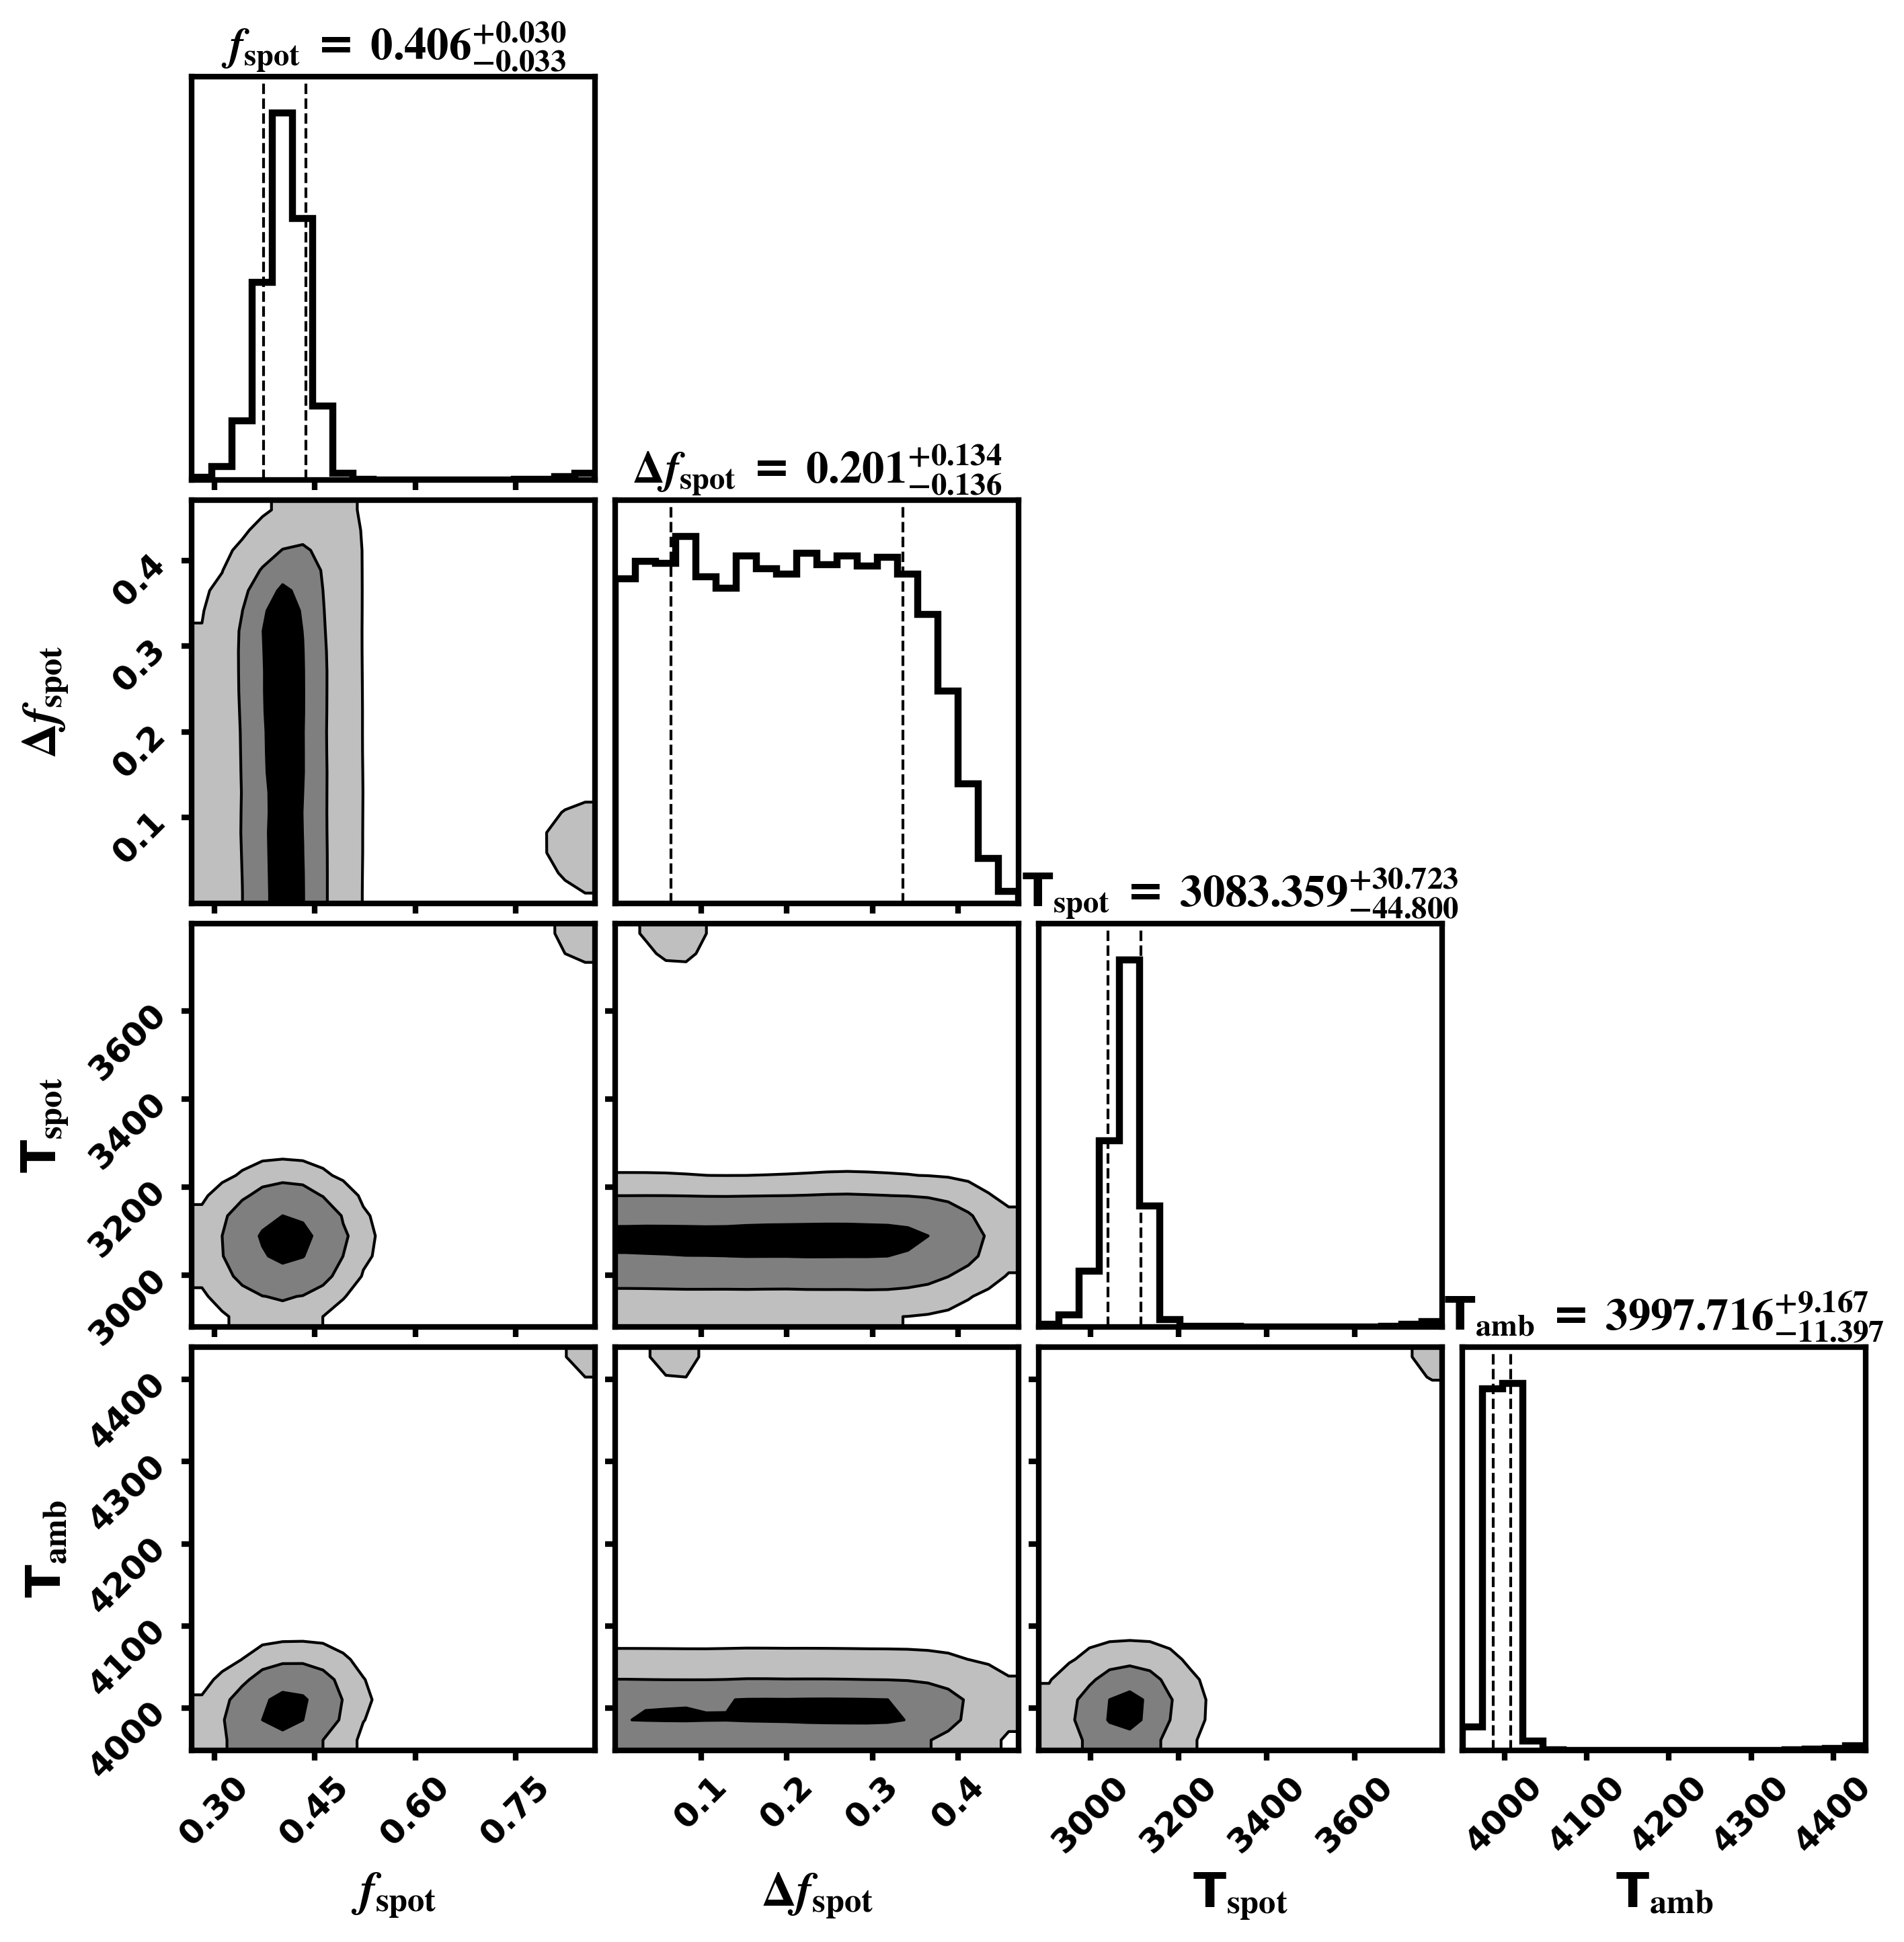

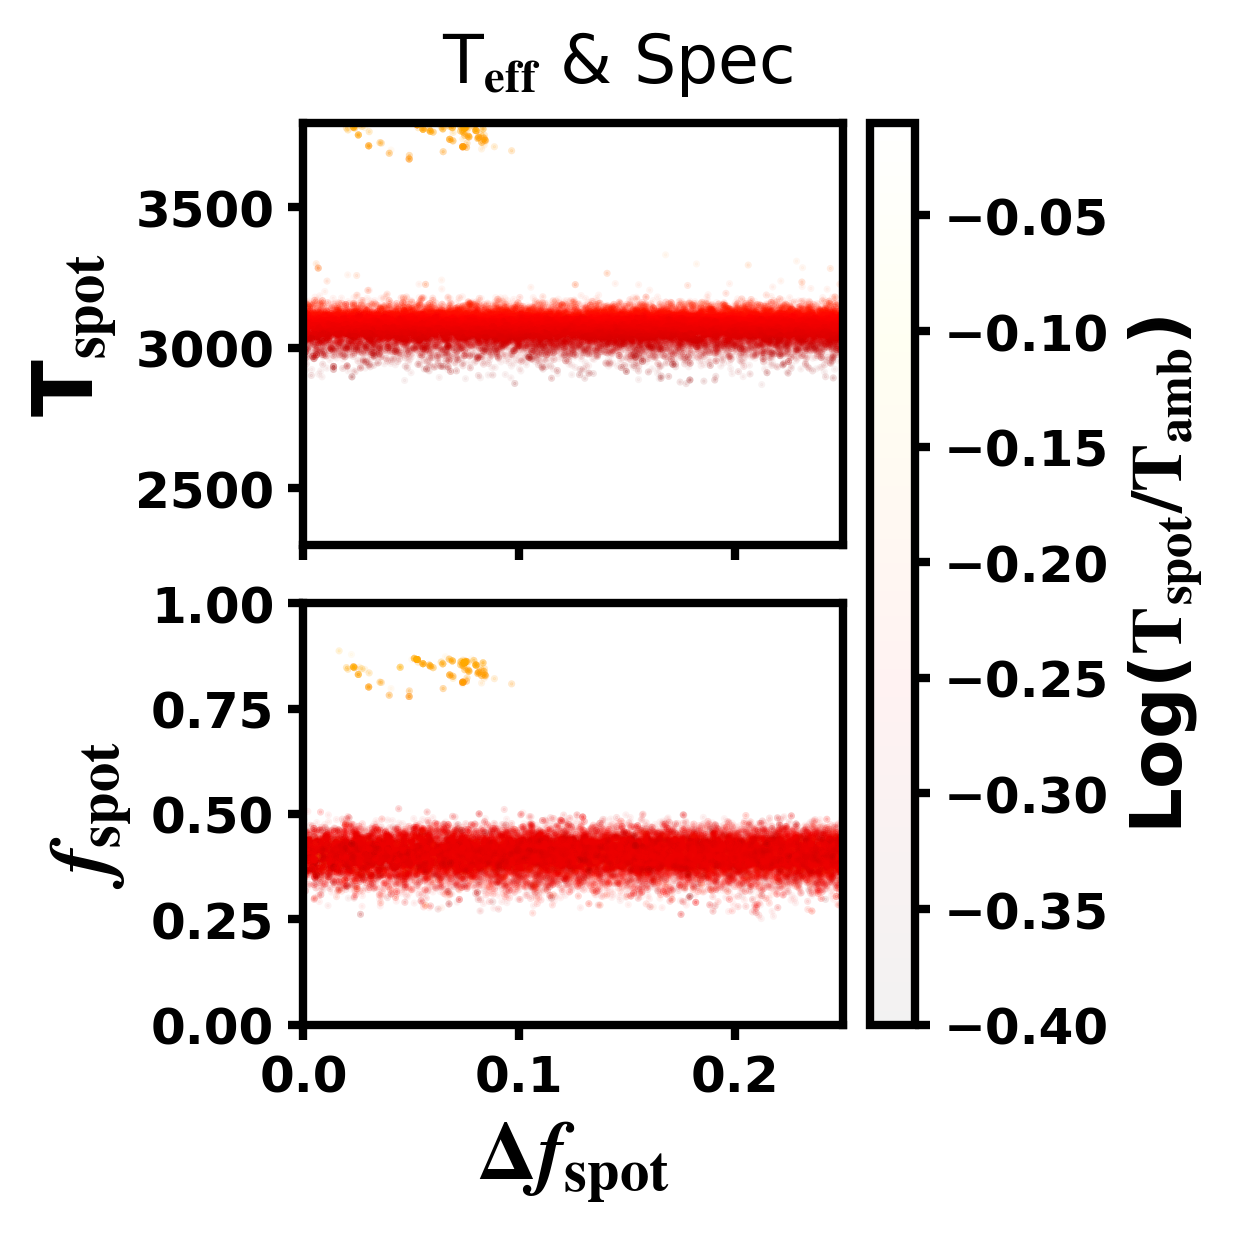

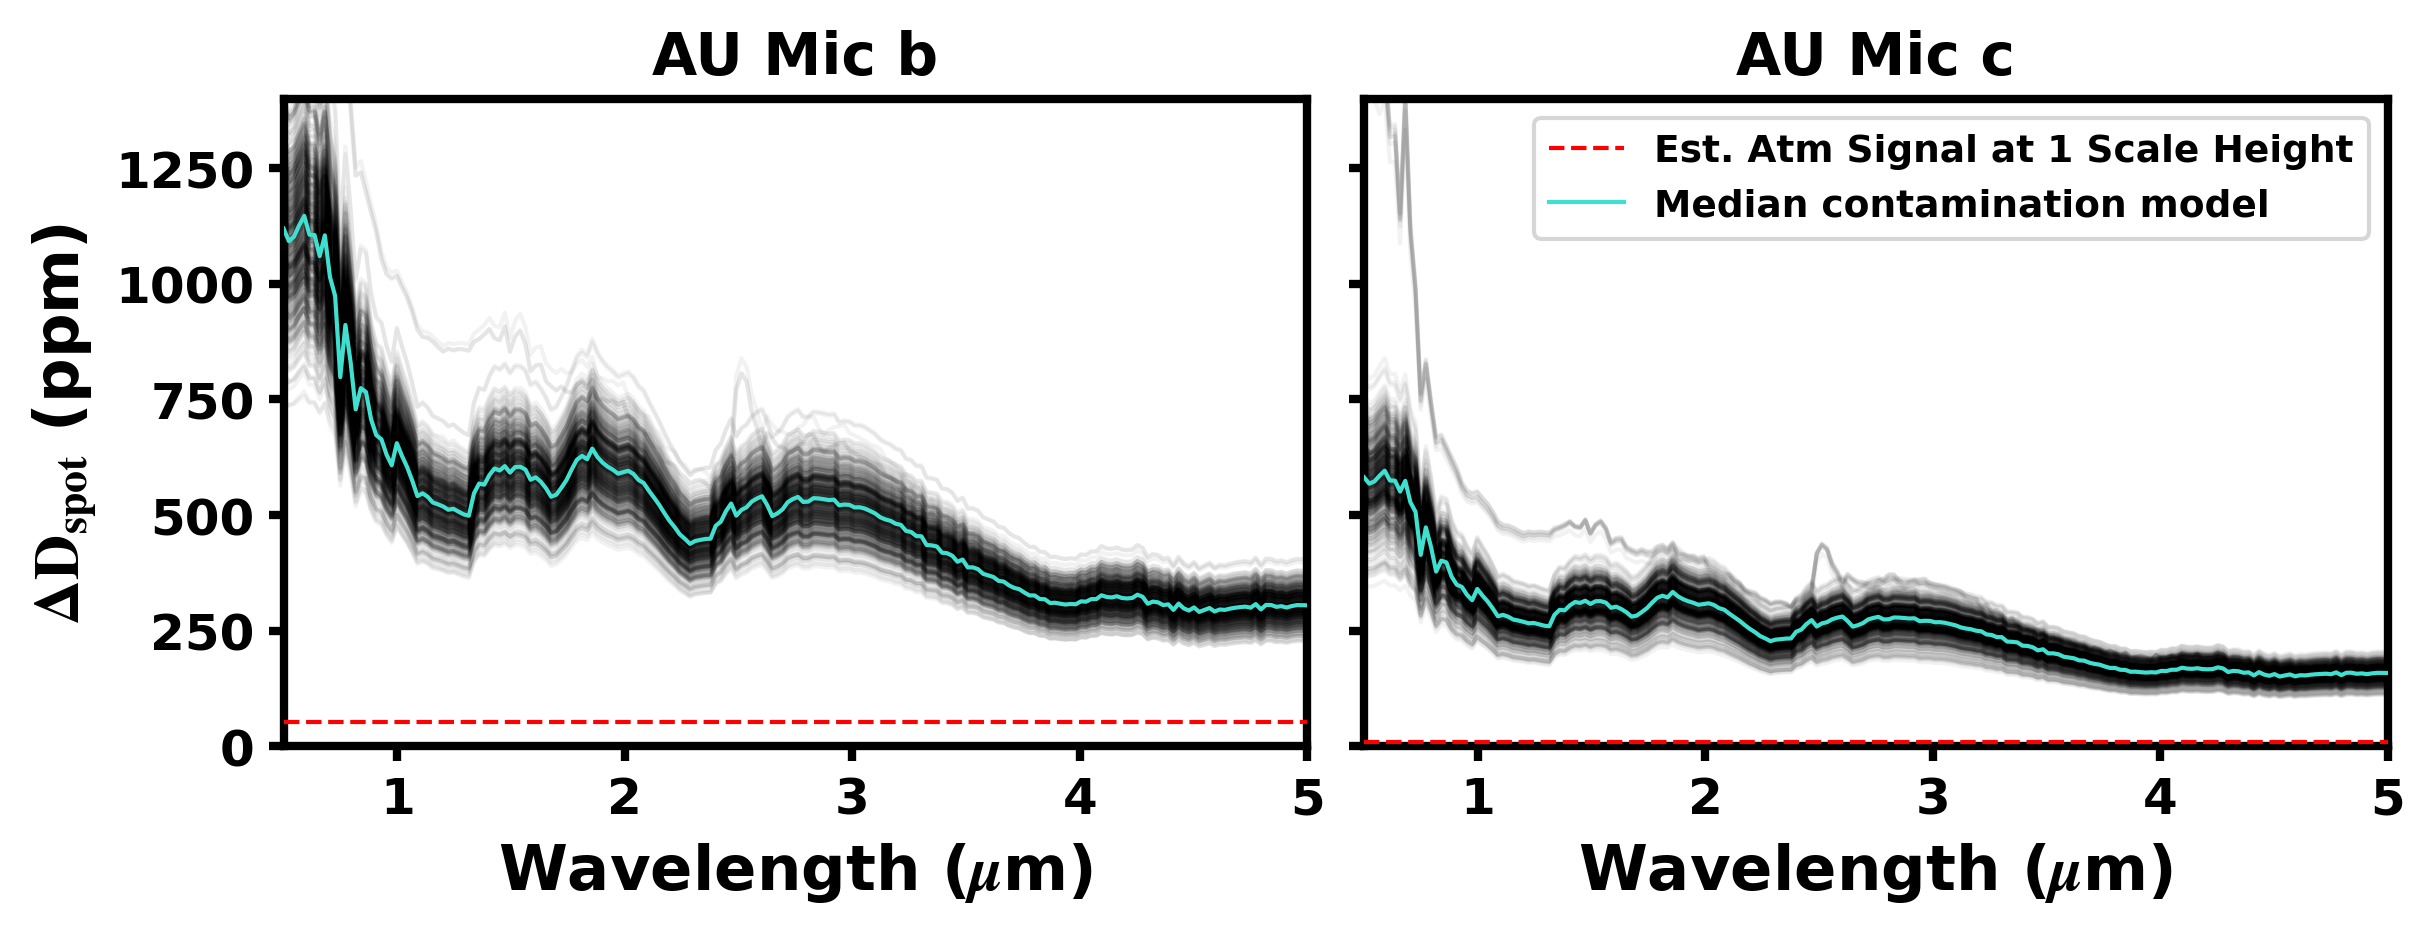

In [71]:
good_orders = [53,54,59,61,69,71,72,75,76,81,82,83]
progress = True

do_Teff = True
model_all_good_orders=True

do_Photometry=False
model_spectra_by_order=False

nsteps=1000
modeltype = 'allgoodorders_2T_spec'
visit = 'jointvisit'
_label = f'{visit}_{modeltype}_{nsteps}steps'

orders_to_model = good_orders

print('beginning MCMC..')
samples = do_mcmc(label = _label,
                  nsteps = nsteps, burnin = int(0.25*nsteps))

reader = emcee.backends.HDFBackend(f'../data/samples/{_label}.h5')
sampler = reader.get_chain(discard=int(0.25*nsteps), flat=True)
samples = sampler.reshape((-1, 4)).T
plot_results(samples=samples,nsteps=nsteps,label=_label,
             title=r'T$_{\rm eff}$ & Spec',visit=visit,
             plot_corner = True,
             plot_variability = False,
             plot_samples = True,
             plot_contamination = True)

beginning MCMC..


100%|██████████| 1000/1000 [7:26:07<00:00, 26.77s/it] 


(Nsteps-burnin)*nwalkers/tau= 1113
(Nsteps-burnin)*nwalkers/tau= 137
(Nsteps-burnin)*nwalkers/tau= 152
(Nsteps-burnin)*nwalkers/tau= 1186
Teff= 3707 25 23
Phot Chisq=5.2 (dof=1)
Spec Chisq=3058.1 (dof=3653)


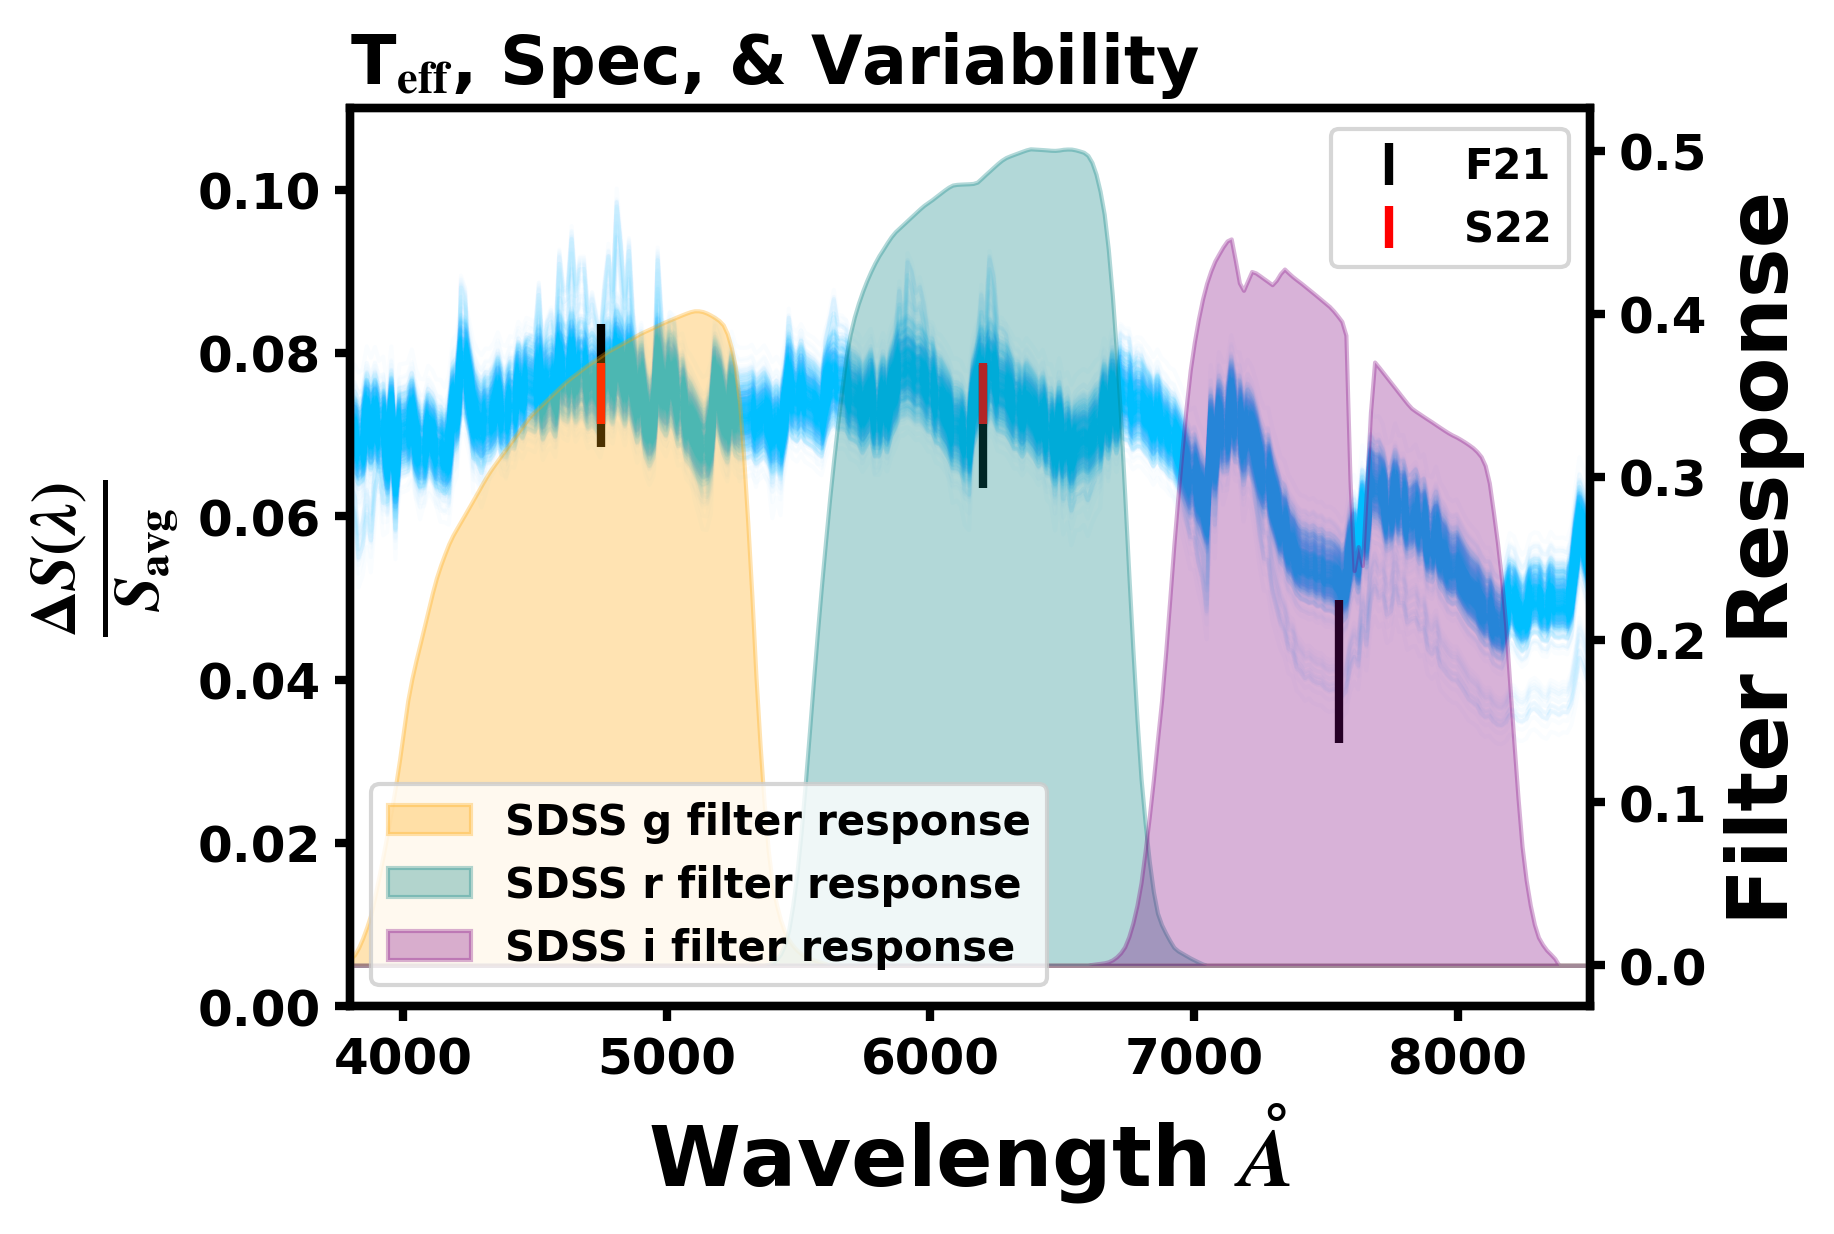

/Users/wiwa8630/opt/anaconda3/envs/the-lab/lib/python3.9/site-packages/corner/core.py:103: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(


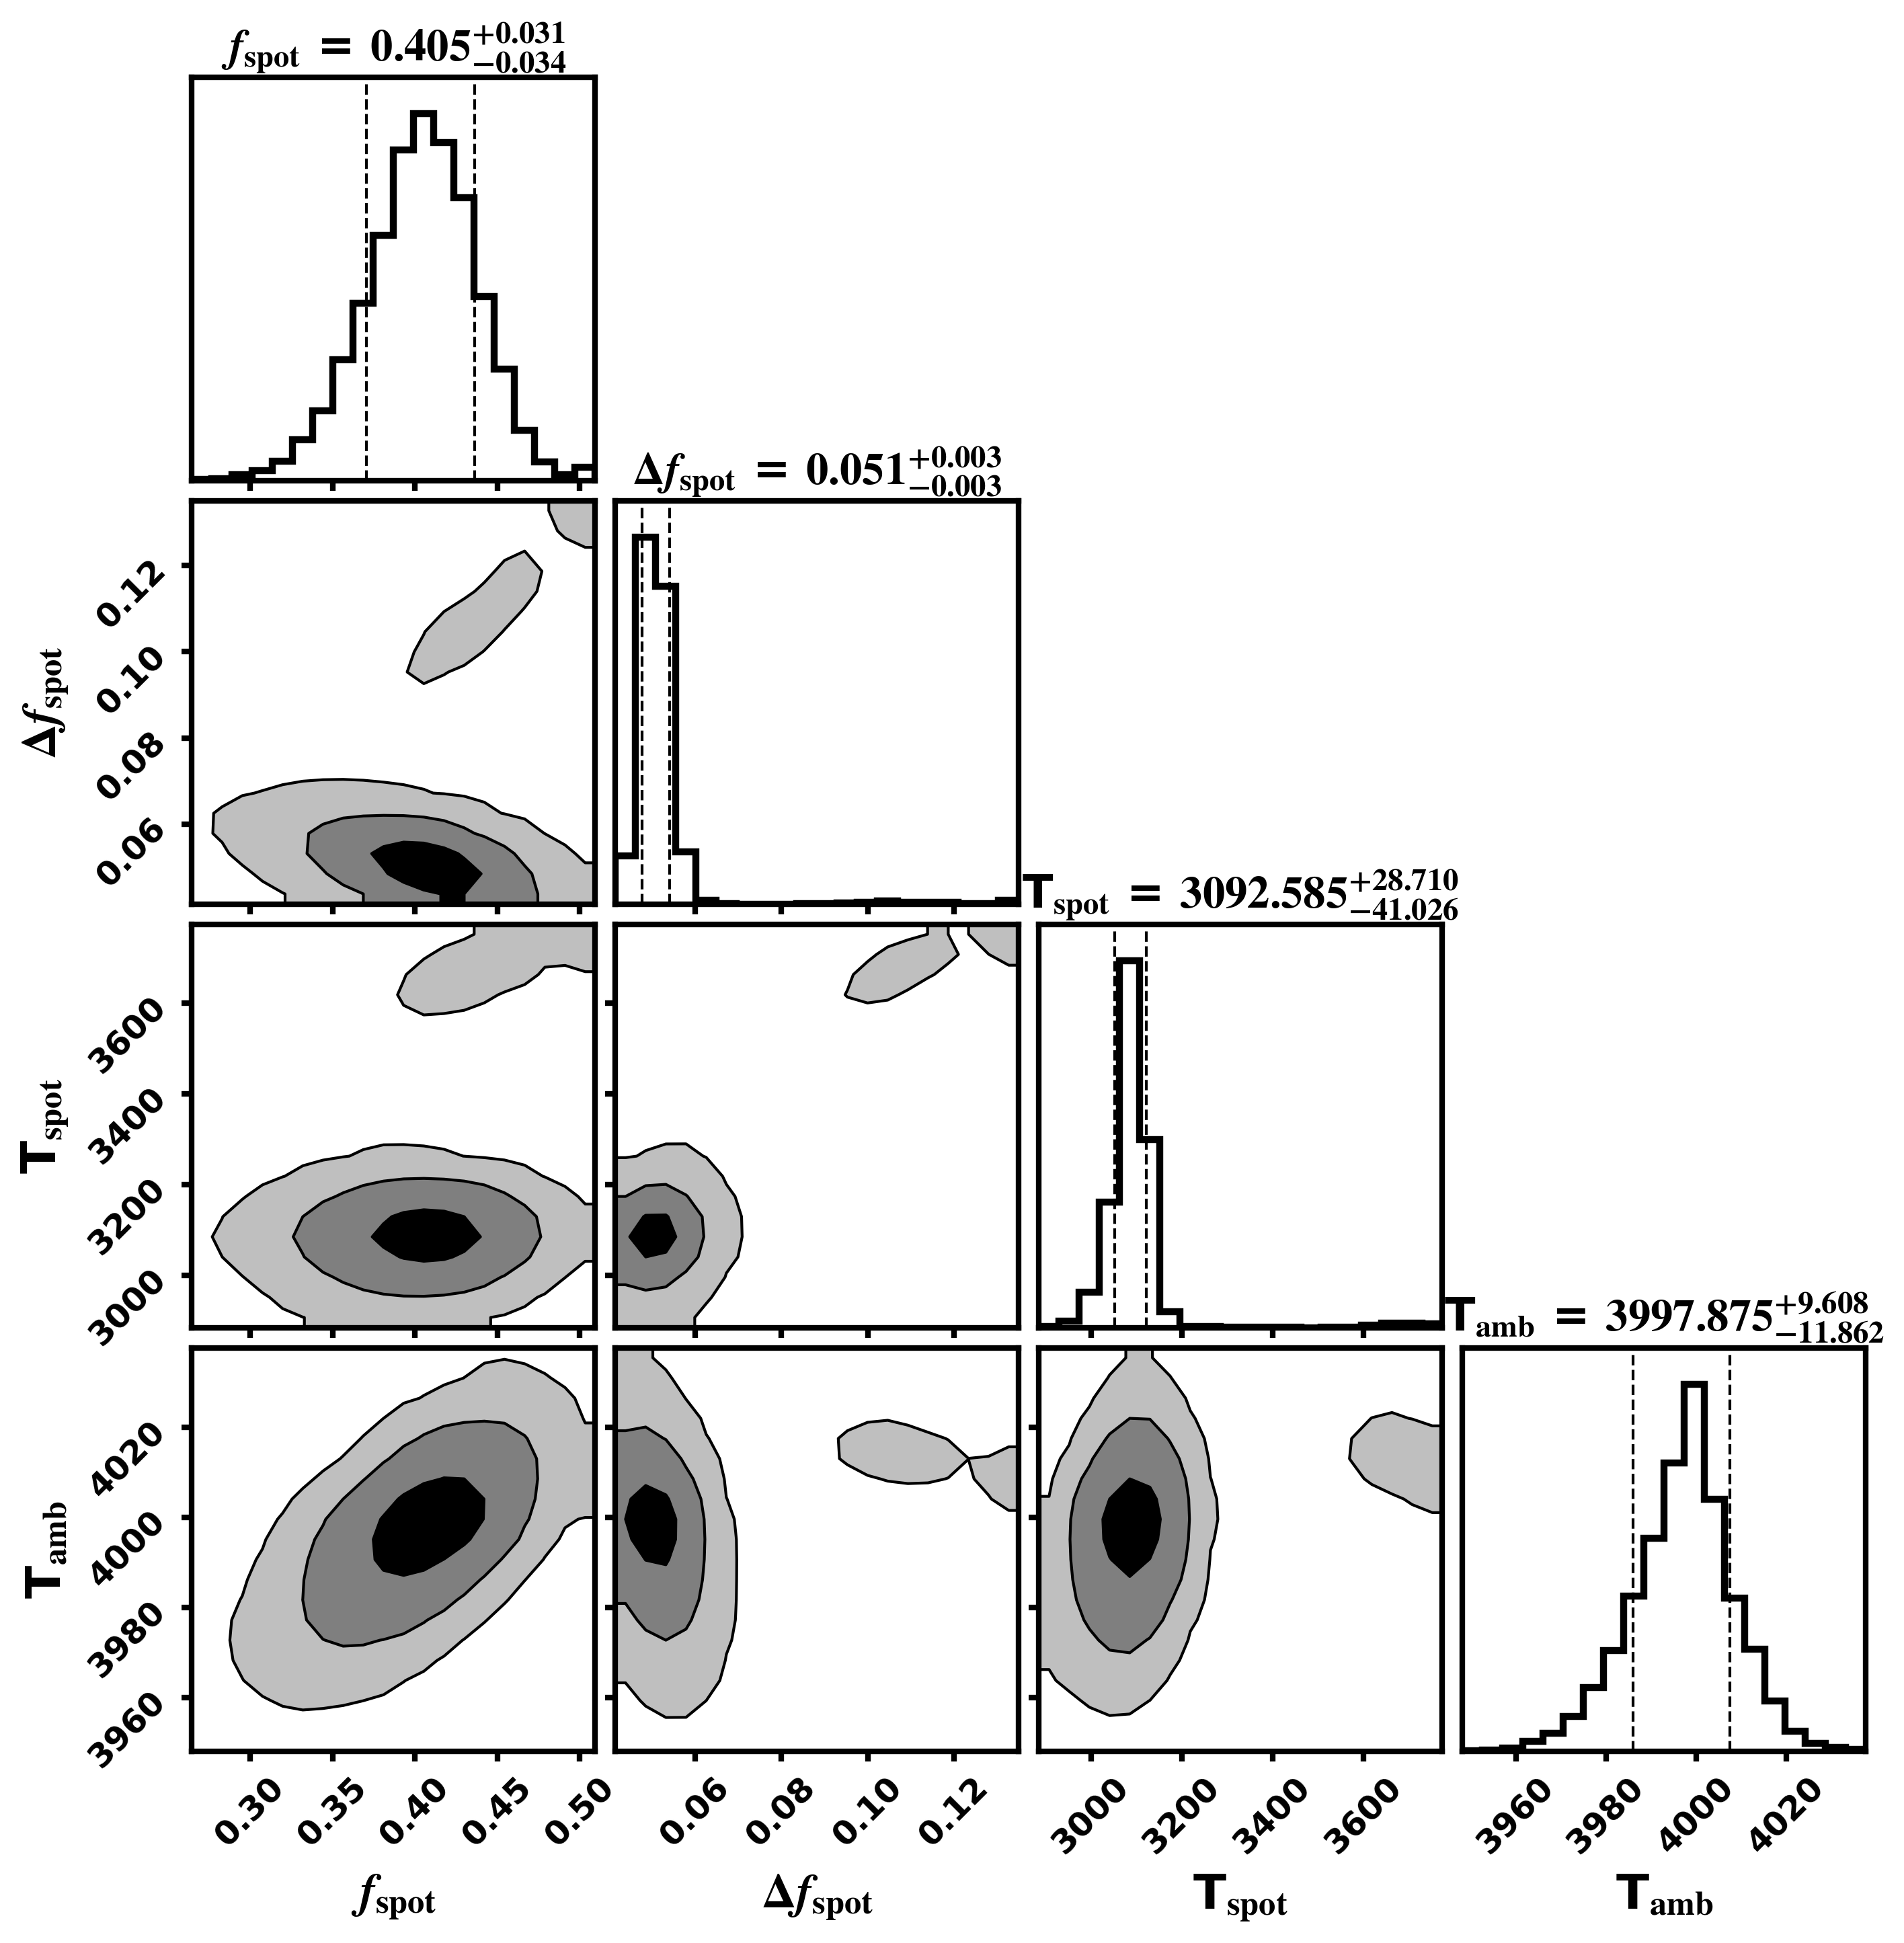

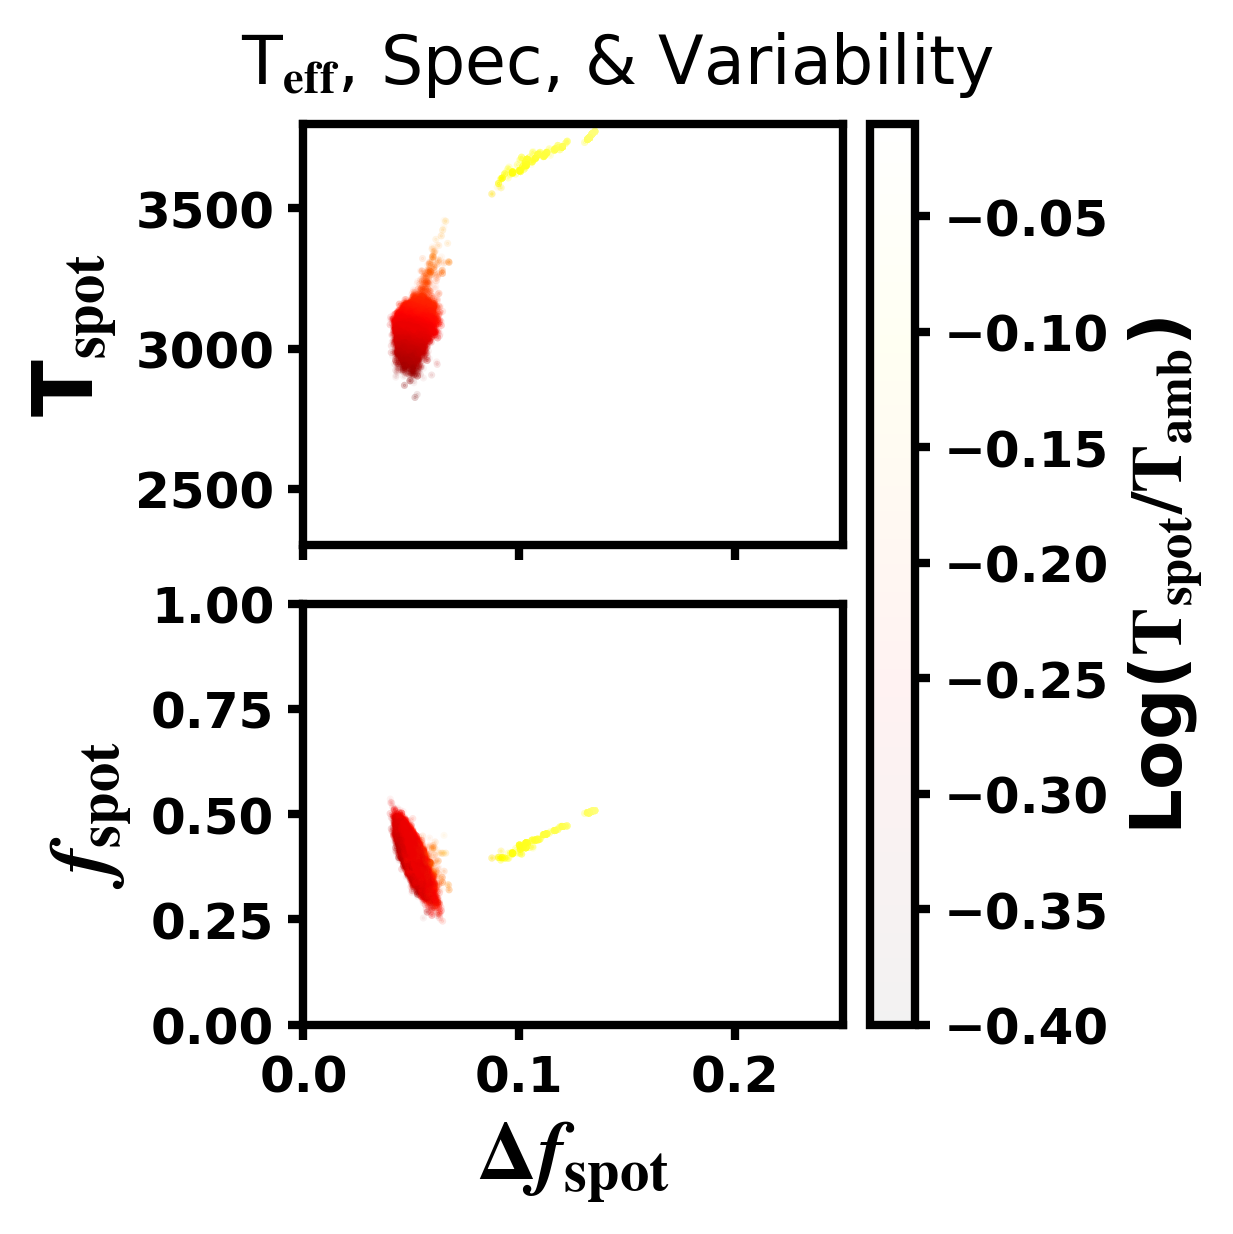

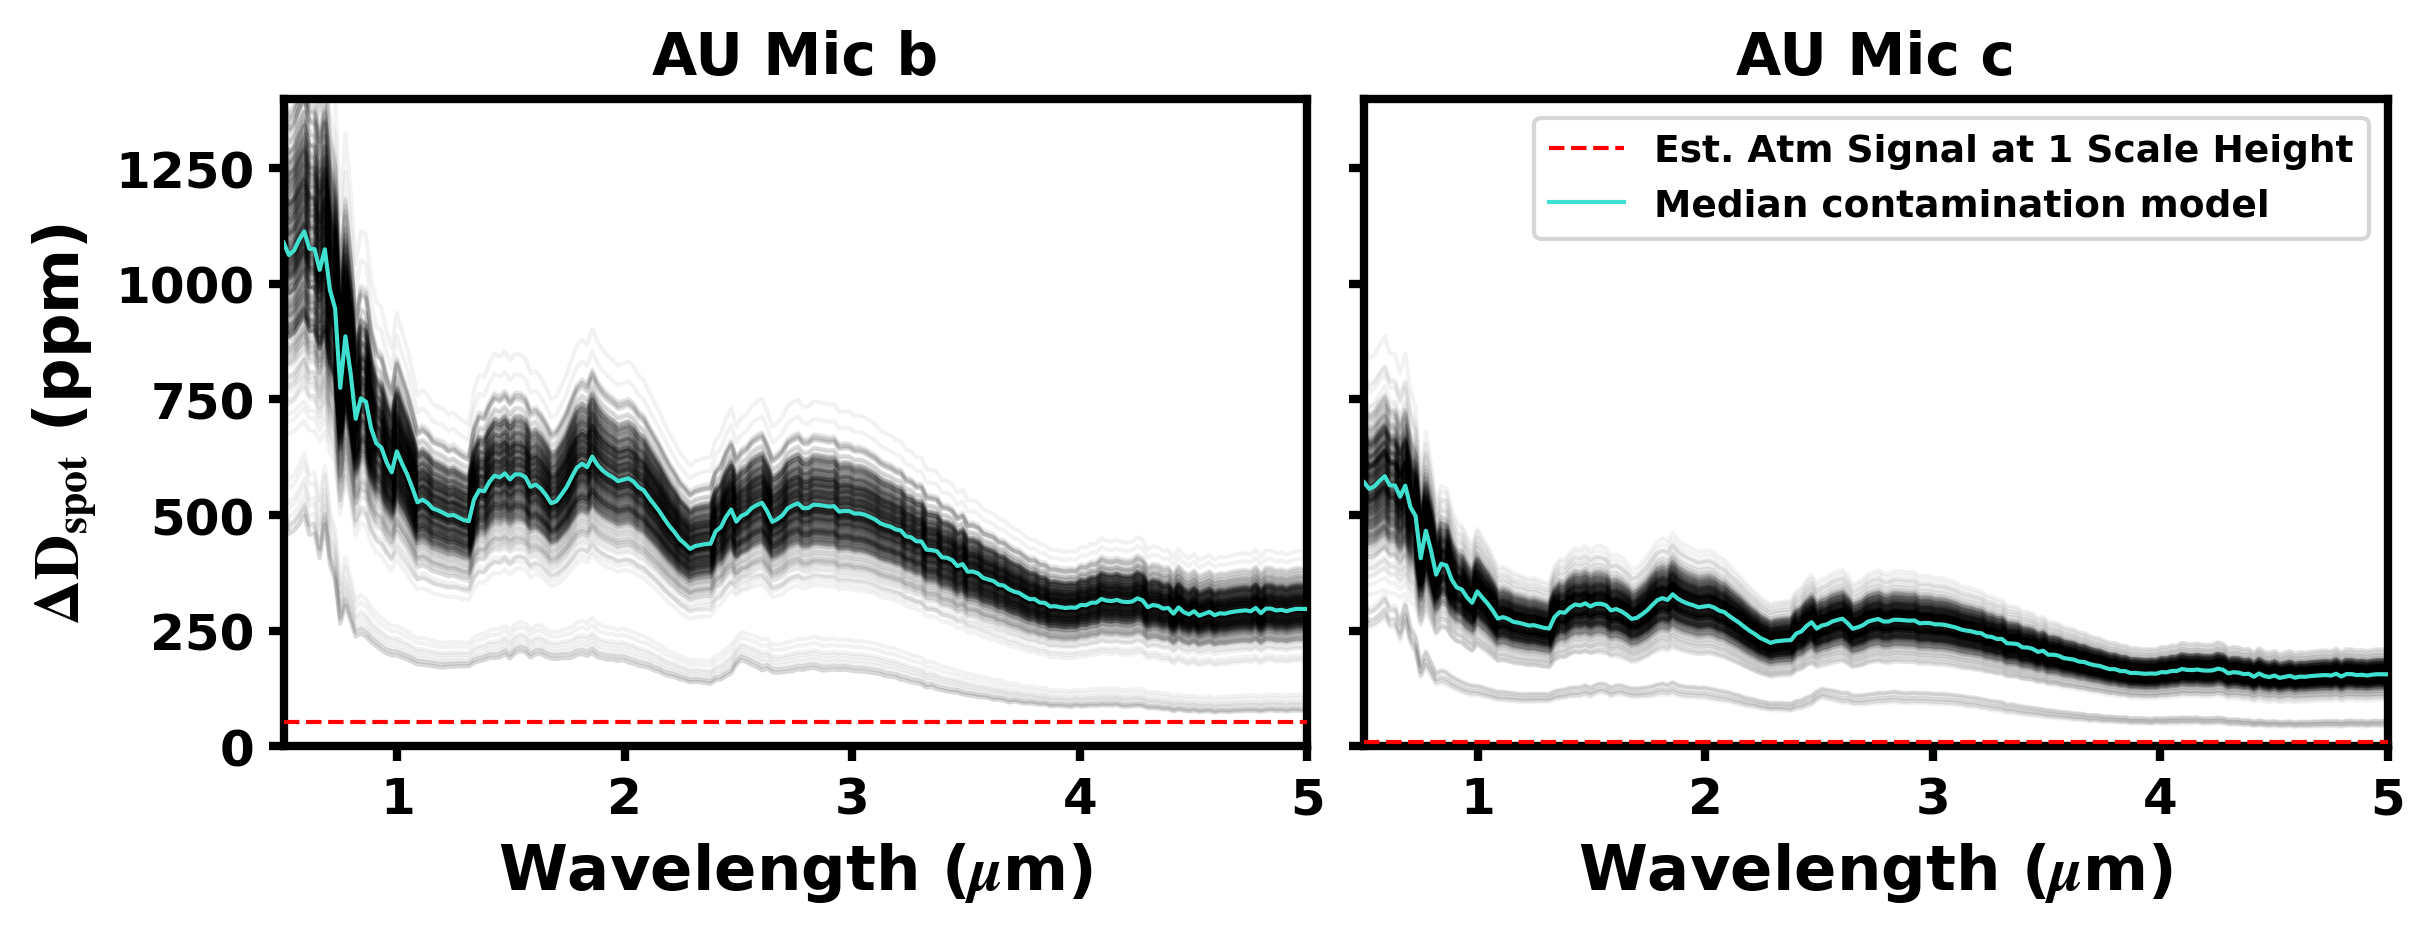

In [72]:
# good_orders = np.array([53,54,59,60,61,64,65,70,71,74,75,77,81,83]) # next try removing 64/65 and adding 70/71
progress = True

do_Photometry=True
do_Teff = True
model_all_good_orders=True

model_spectra_by_order=False

nsteps=1000
modeltype = 'allgoodorders_2T_spec_var'
visit = 'jointvisit'
_label = f'{visit}_{modeltype}_{nsteps}steps'

orders_to_model = good_orders
# Run the MCMC
print('beginning MCMC..')
samples = do_mcmc(label = _label,
                  nsteps = nsteps, burnin = int(0.25*nsteps))

modeltype = 'allgoodorders_2T_spec_var'
visit = 'jointvisit'
_label = f'{visit}_{modeltype}_{nsteps}steps'
reader = emcee.backends.HDFBackend(f'../data/samples/{_label}.h5')
sampler = reader.get_chain(discard=int(0.25*nsteps), flat=True)
samples = sampler.reshape((-1, 4)).T
plot_results(samples=samples,nsteps=nsteps,label=_label,
             title=r'T$_{\rm eff}$, Spec, & Variability',visit=visit,
             plot_variability = True,
             plot_samples = True,
             plot_corner = True,
            plot_contamination = True)

In [ ]:
def spot_depth():
    s_spot = get_phoenix_photons(temperature=Tspot_sam[j], wavelength = wavelength,
                                                               logg=4.52, metallicity=0.0)
    s_amb = get_phoenix_photons(temperature=Tamb_sam[j], wavelength = wavelength,
                                                   logg=4.52, metallicity=0.0)
    flux_ratio = s_spot[1]/s_amb[1]
    top = 1.
    bottom = (1. - fspot_sam[j]) + fspot_sam[j] * flux_ratio
    delta_D_spot = ((top / bottom) - 1.) * depths[l]
    depth_factor = (delta_D_spot/depths[l]) + 1.

    depth_factors[k] = depth_factor

    ax.plot(s_spot[0],(depth_factor-1)*depths[l]*1e6,color = 'k',alpha=0.05,zorder=100) # this will be the input wavelength from the order in question


In [ ]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
plt.rcParams.update(params)
 
nsteps = [1000, 1000, 1000]
visitlabels = ['Teff + Phot','Teff + Spec', 'Ensemble']
ordernumbers = np.array([1,2,3])
visit = 'jointvisit'
labels = [f'{visit}_3T_variability_1000steps',f'{visit}_allgoodorders_3T_spec_1000steps',f'{visit}_allgoodorders_3T_spec_var_1000steps']
        
fig, ax = plt.subplots(2,2,figsize=(9,8),sharex=True)
ax[0,0].set_ylim(2300,4300)
ax[0,0].set_ylabel('T (K)')
ax[0,0].axhspan(3550,3750,color='gray',alpha=0.2,zorder=-100) 
ax[0,0].axhline(3650,color='k',alpha=0.7,zorder=-99)

ax[1,0].set_ylabel(r'$\rm{T_{spot}/T_{amb}}$',fontsize='x-large')
ax[1,0].set_ylim(0.5,1.25)
ax[1,0].set_xticks(ordernumbers, visitlabels)

ax[1,1].set_ylabel(r'$\Delta$T',fontsize='x-large')
ax[1,1].set_ylim(0,1700)    
ax[1,1].set_xticks(ordernumbers, visitlabels)

ax[0,1].set_xlim(0.5,3.5)
ax[0,1].set_ylim(0,0.5)
ax[0,1].set_ylabel('$f_{spot}$',fontsize='x-large')

j=0
for ordernum in ordernumbers:
    l = ordernum - 1
    c11 = 'firebrick'
    c12 = 'deepskyblue'
    c13 = 'orange'
    c21 = 'coral'
    c31 = 'skyblue'
    c41 = 'red'
    c42 = 'black'
    alpha = 0.5

    reader = emcee.backends.HDFBackend(f'../data/samples/{labels[j]}.h5')
    sampler = reader.get_chain(discard=int(0.25*nsteps[j]), flat=True)
    samples = sampler.reshape((-1, 6)).T
    ffac_sam,fspot_sam, dfspot_sam, Tfac_sam,Tspot_sam, Tamb_sam = samples
    famb_sam = 1.0 - (ffac_sam + fspot_sam)
    Teff_sam = (fspot_sam*Tspot_sam**4 + famb_sam*Tamb_sam**4 + ffac_sam*Tfac_sam**4)**(1/4)

    t_ratio = Tspot_sam/Tamb_sam
    delta_t = np.abs(Tamb_sam-Tspot_sam)

    Tspots = ax[0,0].violinplot(Tspot_sam, positions=[ordernumbers[j]],showextrema=False, showmedians=False)
    Tambs = ax[0,0].violinplot(Tamb_sam, positions=[ordernumbers[j]],showextrema=False, showmedians=False)
    Teffs = ax[0,0].violinplot(Teff_sam, positions=[ordernumbers[j]],showextrema=False, showmedians=False)
    for pc in Tambs['bodies']:
        if l == 0: 
            pc.set_label(r'$\rm{T_{amb}}$')
        pc.set_facecolor(c12)
        pc.set_edgecolor('black')
        pc.set_alpha(alpha)
    for pc in Teffs['bodies']:
        if l == 0: 
            pc.set_label(r'$\rm{T_{eff}}$')
        pc.set_facecolor(c13)
        pc.set_edgecolor('black')
        pc.set_alpha(alpha)
    for pc in Tspots['bodies']:
        pc.set_facecolor(c11)
        if j == 0:
            if l == 0: 
                pc.set_label(r'$\rm{T_{spot}}$')
        pc.set_edgecolor('black')
        pc.set_alpha(alpha)

    ratios = ax[1,0].violinplot(t_ratio, positions=[ordernumbers[j]],showextrema=False, showmedians=False)
    for pc in ratios['bodies']:
        pc.set_facecolor(c21)
        pc.set_edgecolor('black')
        pc.set_alpha(alpha)

    deltas = ax[1,1].violinplot(delta_t, positions=[ordernumbers[j]],showextrema=False, showmedians=False)
    for pc in deltas['bodies']:
        pc.set_facecolor(c31)
        pc.set_edgecolor('black')
        pc.set_alpha(alpha)

    fspots = ax[0,1].violinplot(fspot_sam, positions=[ordernumbers[j]],showextrema=False, showmedians=False)
    for pc in fspots['bodies']:
        if l == 0: 
            pc.set_label(r'$f_{\rm{spot}}$')
        pc.set_facecolor(c41)
        pc.set_edgecolor('black')
        pc.set_alpha(alpha)
    dfspots = ax[0,1].violinplot(dfspot_sam, positions=[ordernumbers[j]],showextrema=False, showmedians=False)
    for pc in dfspots['bodies']:
        if l == 0: 
            pc.set_label(r'$\Delta f_{\rm{spot}}$')
        pc.set_facecolor(c42)
        pc.set_edgecolor('black')
        pc.set_alpha(alpha)
        
    j+=1
        
ax[0,0].legend(loc='lower left')
ax[0,1].legend()
# ax[1,0].legend()
# ax[1,1].legend()

    
plt.savefig(f'../figs/ensemble_violin.png',dpi=400)
plt.show()